In [1]:
# defining root location of the project on local system (change this to your own path after pulling)
import numpy as np 
import pandas as pd
import helpers as h
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

# set up plotting config
mpl.rcParams['mathtext.fontset'] = 'stix'  # or 'dejavusans', 'cm', 'custom'
mpl.rcParams['font.family'] = 'STIXGeneral'  # Matches STIX math font
# set tick font size
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
# set default fontsize
mpl.rcParams['font.size'] = 14

# define root
ROOT = "/home/andreasstillits/coding/Leaves1D/"
%pwd

'/home/andreasstillits/coding/Leaves1D/figures/scripts'

### Figure 3A

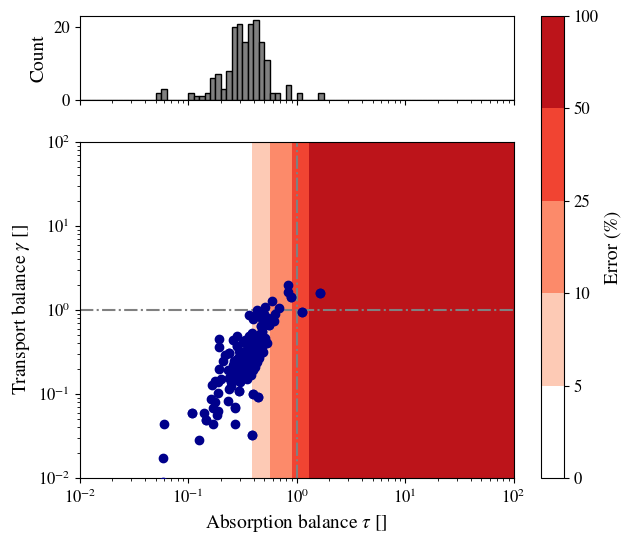

In [ ]:
# load data 
PATH = ROOT + "data/saved_data/Knauer2022_hypostomatous.csv"
df = pd.read_csv(PATH, decimal=',', sep=';')

# define (tau, gamma) resolution and error map
N = 100
vmin, vmax = 0.01, 100
taus = np.exp(np.linspace(np.log(vmin), np.log(vmax), N))
gammas = np.exp(np.linspace(np.log(vmin), np.log(vmax), N))
err = 100*(taus/np.tanh(taus) - 1)
error = np.array([err for _ in gammas])


# Make discrete colormap
cmap = plt.get_cmap('Reds', 6)
colors = cmap(range(5))
colors[0] = (1, 1, 1, 1)  # set the first color to white
cmap = ListedColormap(colors)
bounds = [0, 5, 10, 25, 50, 100]
norm = BoundaryNorm(bounds, cmap.N)

fig, (ax_hist, ax_map) = plt.subplots(
    2, 1,
    sharex=True,
    gridspec_kw={"height_ratios": [1, 4]},
    figsize=(7, 6)
 )


bins = np.logspace(np.log10(0.01), np.log10(100), 4*20+1)

def std_histogram(ax: plt.Axes, hide_xlabel: bool = True):
    ax.set_xscale('log')
    ax.set_ylabel('Count')
    if hide_xlabel:
        ax.tick_params(labelbottom=False)

ax_hist.hist(df["tau"], bins=bins, color="grey", edgecolor="black")
std_histogram(ax_hist)


map = ax_map.pcolor(taus, gammas, error,
                    shading="nearest",
                    cmap=cmap,
                    norm=norm)

fig.colorbar(map, ax=[ax_map, ax_hist], label='Error (%)', boundaries=bounds, ticks=bounds)
ax_map.scatter(df['tau'], df['gamma'], color="darkblue", marker="o", zorder=3)
h.std_layout(ax_map)
plt.show()


### Figure 3B

### Figure 3C